In [39]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/churn-for-bank-customers")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ENVY\.cache\kagglehub\datasets\mathchi\churn-for-bank-customers\versions\1


In [40]:
import pandas as pd

churn = pd.read_csv(f"{path}/churn.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [42]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [43]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
churn.duplicated().sum()

np.int64(0)

In [45]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [46]:
churn.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1, inplace=True)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
churn['Geography'] = churn['Geography'].astype('category')
churn['Gender'] = churn['Gender'].astype('category')

In [48]:
churn['HasCrCard'] = churn['HasCrCard'].astype('int')
churn['IsActiveMember'] = churn['IsActiveMember'].astype('int')
churn['Exited'] = churn['Exited'].astype('int')

In [49]:
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [54]:
churn.select_dtypes(include='object').head()


""
0
1
2
3
4


In [53]:
churn.columns
churn.shape

(10000, 11)

Numeric columns: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


,q1,q3,iqr,lower,upper,outlier_count,outlier_percent,extreme_outlier_count
column,,,,,,,,
Exited,0.00,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,2037,20.37,2037
Age,32.00,4.400000e+01,12.0000,1.400000e+01,6.200000e+01,359,3.59,12
NumOfProducts,1.00,2.000000e+00,1.0000,-5.000000e-01,3.500000e+00,60,0.60,0
CreditScore,584.00,7.180000e+02,134.0000,3.830000e+02,9.190000e+02,15,0.15,0
RowNumber,2500.75,7.500250e+03,4999.5000,-4.998500e+03,1.499950e+04,0,0.00,0
CustomerId,15628528.25,1.575323e+07,124705.5000,1.544147e+07,1.594029e+07,0,0.00,0
Tenure,3.00,7.000000e+00,4.0000,-3.000000e+00,1.300000e+01,0,0.00,0
Balance,0.00,1.276442e+05,127644.2400,-1.914664e+05,3.191106e+05,0,0.00,0
HasCrCard,0.00,1.000000e+00,1.0000,-1.500000e+00,2.500000e+00,0,0.00,0



Z-score (>3) outlier counts (on non-null rows):


Age                133
NumOfProducts       60
CreditScore          8
CustomerId           0
RowNumber            0
Tenure               0
Balance              0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Rows with at least one IQR outlier: 2323 / 10000 (23.23%)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
30,31,15589475,Azikiwe,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1
35,36,15794171,Lombardo,475,France,Female,45,0,134264.04,1,1,0,27822.99,1


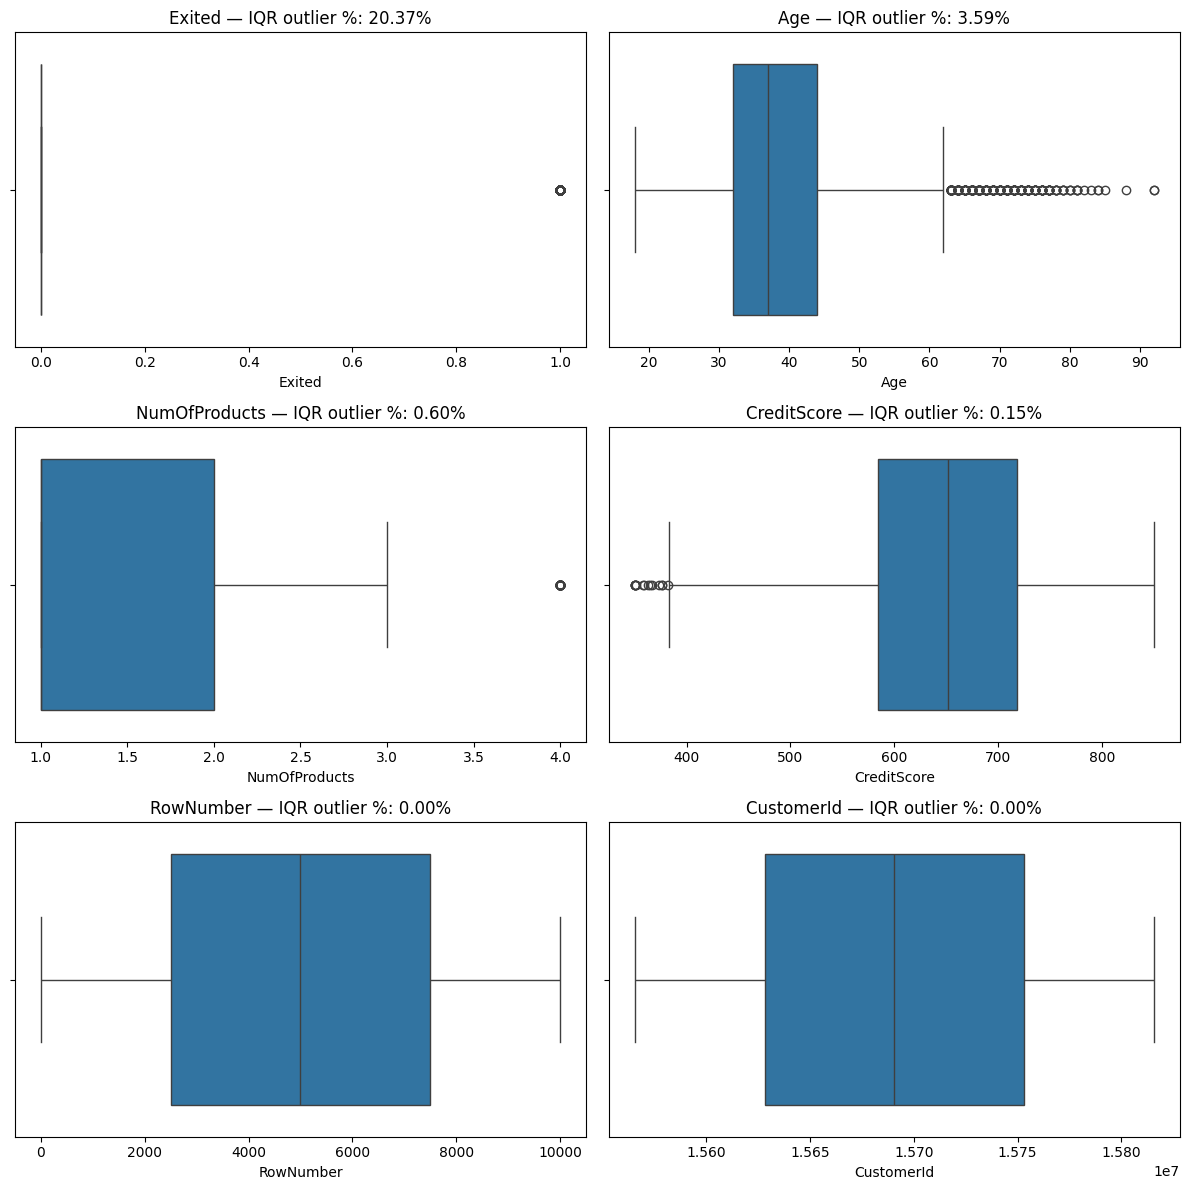


Recommendations:
- Review the columns above with high outlier percentages.
- For modeling: consider log-transform, winsorizing, or removing extreme rows depending on domain knowledge.
- If outliers are data errors (e.g., negative ages, impossible values), clean them before training.


In [17]:
# Outlier checks (IQR + Z-score) and visualisations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scistats

# ...existing code...

# Identify numeric columns
numeric_cols = churn.select_dtypes(include=["number"]).columns.tolist()
print("Numeric columns:", numeric_cols)

# Quick descriptive table for numeric columns
display(churn[numeric_cols].describe().T)

# IQR-based outlier summary per column
def iqr_outlier_stats(df, cols):
    rows = []
    for c in cols:
        col = df[c]
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        # count outliers (excluding NaNs)
        mask = col.lt(lower) | col.gt(upper)
        count = int(mask.sum())
        pct = 100 * count / col.notna().sum() if col.notna().sum() else 0
        # extreme outliers (beyond 3*IQR)
        lower_ext = q1 - 3 * iqr
        upper_ext = q3 + 3 * iqr
        mask_ext = col.lt(lower_ext) | col.gt(upper_ext)
        ext_count = int(mask_ext.sum())
        rows.append({
            'column': c,
            'q1': q1,
            'q3': q3,
            'iqr': iqr,
            'lower': lower,
            'upper': upper,
            'outlier_count': count,
            'outlier_percent': pct,
            'extreme_outlier_count': ext_count
        })
    return pd.DataFrame(rows).set_index('column')

iqr_stats = iqr_outlier_stats(churn, numeric_cols)
# show sorted by percent of outliers
display(iqr_stats.sort_values('outlier_percent', ascending=False))

# Z-score based check (|z| > 3)
z_df = churn[numeric_cols].dropna()
z = np.abs(scistats.zscore(z_df))
if z.size:
    z_counts = (z > 3).sum(axis=0)
    z_counts = pd.Series(z_counts, index=z_df.columns)
    print('\nZ-score (>3) outlier counts (on non-null rows):')
    display(z_counts.sort_values(ascending=False))
else:
    print('\nNot enough numeric data to compute Z-scores.')

# Flag rows with any IQR outlier
def rows_with_iqr_outlier(df, cols):
    masks = []
    for c in cols:
        col = df[c]
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        masks.append(col.lt(lower) | col.gt(upper))
    any_outlier = np.column_stack(masks).any(axis=1)
    return any_outlier

any_out = rows_with_iqr_outlier(churn, numeric_cols)
print(f"Rows with at least one IQR outlier: {any_out.sum()} / {len(churn)} ({100*any_out.sum()/len(churn):.2f}%)")

# show a sample of rows with outliers
if any_out.sum():
    display(churn.loc[any_out].head(8))

# Boxplots for the top columns with highest outlier percent
top_cols = iqr_stats.sort_values('outlier_percent', ascending=False).head(6).index.tolist()
if top_cols:
    n = len(top_cols)
    fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(12, 4 * ((n+1)//2)))
    axes = axes.flatten()
    for ax, col in zip(axes, top_cols):
        sns.boxplot(x=churn[col], ax=ax)
        ax.set_title(f"{col} — IQR outlier %: {iqr_stats.loc[col,'outlier_percent']:.2f}%")
    # hide any unused axes
    for i in range(len(top_cols), len(axes)):
        axes[i].set_visible(False)
    plt.tight_layout()
    plt.show()
else:
    print('No numeric columns found for plotting.')

# Short recommendations
print('\nRecommendations:')
print('- Review the columns above with high outlier percentages.')
print('- For modeling: consider log-transform, winsorizing, or removing extreme rows depending on domain knowledge.')
print('- If outliers are data errors (e.g., negative ages, impossible values), clean them before training.')